In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 40)

In [3]:
df = pd.read_csv("/content/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv")

In [4]:
df.shape

(650, 8)

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [7]:
df['Reviews'] = df['Reviews'].str.replace(',','').astype(int)

In [8]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [9]:
df["Price_r"] = df["Price_r"].str.replace('$','').astype(int)

In [10]:
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [11]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
7,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30.0,30,1970,Fiction
57,Calm the F*ck Down: An Irreverent Adult Colori...,Sasha O'Hara,4.6,10369,4.0,4,1970,Non Fiction


In [12]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Price_r        0
Year           0
Genre          0
dtype: int64

In [13]:
df["Author"].value_counts()

Author
Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
American Psychological Association    11
Rick Riordan                          11
                                      ..
Sean Hannity                           1
Rob Bell                               1
Admiral William H. McRaven             1
Julia Child                            1
Wonder House Books                     1
Name: count, Length: 292, dtype: int64

<Axes: title={'center': 'Top 10 Writers with Most Books'}, xlabel='Author'>

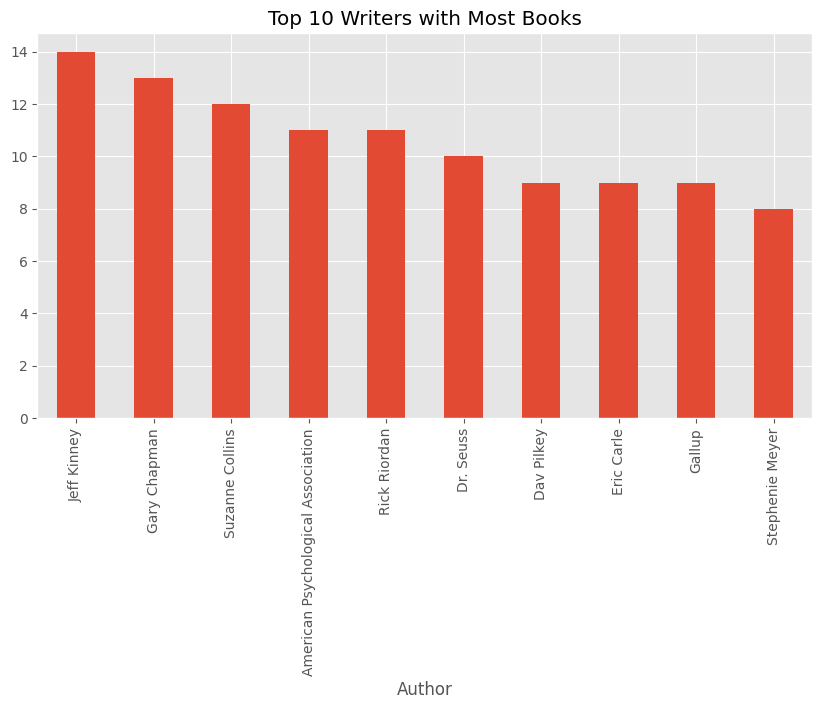

In [14]:
# top ten writers with most books
df["Author"].value_counts().head(10).plot(kind="bar", figsize=(10, 5),y="count", title="Top 10 Writers with Most Books")

In [15]:
df["Year"].value_counts()

Year
1970    650
Name: count, dtype: int64

In [16]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
264,Looking for Alaska,John Green,4.5,8491,7.0,7,1970,Fiction
259,Little Bee: A Novel,Chris Cleave,4.1,1467,10.0,10,1970,Fiction


In [17]:
df.groupby("Genre")["Name"].count()

Genre
Fiction        287
Non Fiction    363
Name: Name, dtype: int64

<Axes: title={'center': 'Fiction Vs Non-Fiction Books: By Genre'}, xlabel='Genre', ylabel='count'>

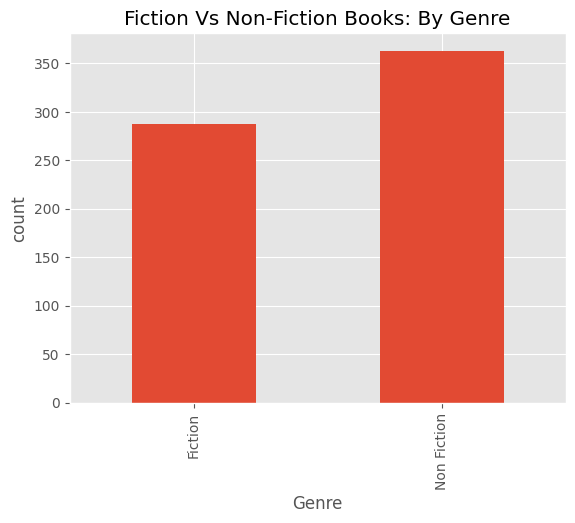

In [18]:
# plotting Fiction and Non-Fiction: By Genre
df.groupby("Genre")["Name"].count().plot(kind="bar", ylabel="count", title="Fiction Vs Non-Fiction Books: By Genre")

In [19]:
df["Price"].value_counts()

Price
8.00     56
6.00     44
9.00     42
5.00     40
11.00    36
         ..
14.40     1
8.48      1
8.49      1
14.16     1
5.98      1
Name: count, Length: 87, dtype: int64

In [20]:
df.groupby("Genre")["Price"].mean()

Genre
Fiction        10.565505
Non Fiction    14.502507
Name: Price, dtype: float64

<Axes: title={'center': 'Average Price of a Book: By Genre'}, xlabel='Genre', ylabel='average price'>

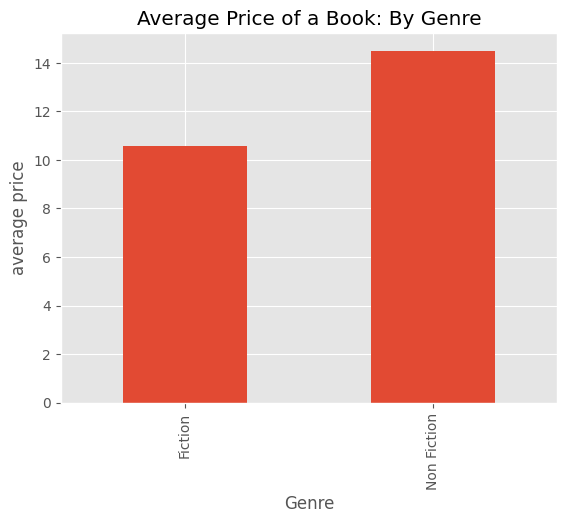

In [21]:
# average price of a book: By Genre
df.groupby("Genre")["Price"].mean().plot(kind="bar", ylabel="average price", title="Average Price of a Book: By Genre")

In [22]:
df.groupby("Price")["Name"].unique()

Price
0.0      [Cabin Fever (Diary of a Wimpy Kid, Book 6), D...
1.0      [Eat This Not That! Supermarket Survival Guide...
2.0      [A Patriot's History of the United States: Fro...
3.0        [A Higher Loyalty: Truth, Lies, and Leadership]
4.0      [Adult Coloring Book Designs: Stress Relief Co...
                               ...                        
52.0          [Harry Potter Paperback Box Set (Books 1-7)]
53.0     [The Book of Basketball: The NBA According to ...
54.0                            [Hamilton: The Revolution]
82.0                        [The Twilight Saga Collection]
105.0    [Diagnostic and Statistical Manual of Mental D...
Name: Name, Length: 87, dtype: object

In [23]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
598,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,0,1970,Fiction
472,The Guardians: A Novel,John Grisham,4.5,13609,14.0,14,1970,Fiction


In [24]:
df["User Rating"].value_counts()

User Rating
4.8    168
4.7    129
4.6    115
4.9     69
4.5     65
4.4     39
4.3     29
4.0     15
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

<Axes: title={'center': 'Number of User Ratings'}, xlabel='User Rating', ylabel='count'>

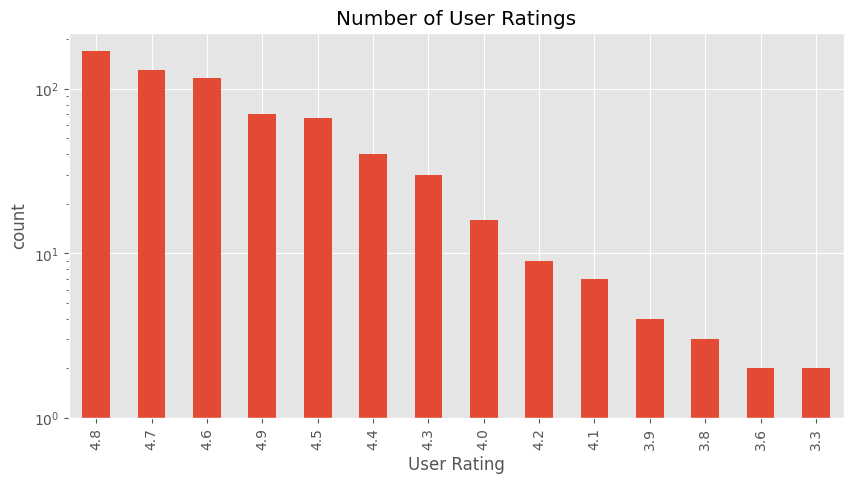

In [25]:
# Number of user ratings
df["User Rating"].value_counts().plot(kind="bar", figsize=(10, 5), ylabel="count", title="Number of User Ratings", log=True)

In [26]:
df.drop(columns=["Year"], inplace=True)

In [27]:
df[(df["User Rating"] >= 4.8) & (df["Reviews"] >= 10000) & (df["Genre"] == "Non Fiction") & (df["Price"] < 20)]

,Name,Author,User Rating,Reviews,Price,Price_r,Genre
26,American Marxism,Mark R. Levin,4.8,33712,12.52,13,Non Fiction
31,Atlas of the Heart: Mapping Meaningful Connect...,Brené Brown,4.8,13893,17.78,18,Non Fiction
32,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,29634,12.00,12,Non Fiction
33,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,104159,11.98,12,Non Fiction
39,Becoming,Michelle Obama,4.8,61133,11.00,11,Non Fiction
...,...,...,...,...,...,...,...
610,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16.00,16,Non Fiction
611,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13.00,13,Non Fiction
612,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16.00,16,Non Fiction
617,Untamed,Glennon Doyle,4.8,41567,15.00,15,Non Fiction


In [28]:
df[(df["User Rating"] >= 4.8) & (df["Reviews"] >= 10000) & (df["Genre"] == "Non Fiction") & (df["Price"] < 20)]\
.groupby("User Rating")["Price"].mean()

User Rating
4.8    11.731591
4.9     9.206000
Name: Price, dtype: float64

In [29]:
"""The average price for books with user_rating of >= 4.8 and that has review of more than 10000, genre is Non Fiction and price below 20 dollar
for rating of 4.8, the price is 11.73 dollar and
for rating of 4.9, the price is 9.20 dollar

"""

'The average price for books with user_rating of >= 4.8 and that has review of more than 10000, genre is Non Fiction and price below 20 dollar\nfor rating of 4.8, the price is 11.73 dollar and\nfor rating of 4.9, the price is 9.20 dollar\n\n'

In [30]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Price_r,Genre
130,Fifty Shades Trilogy (Fifty Shades of Grey / F...,E L James,4.5,13964,32.0,32,Fiction
282,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8.0,8,Fiction


In [31]:
df.sort_values("Reviews", ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Price_r,Genre
513,The Midnight Library: A Novel,Matt Haig,4.3,193482,13.29,14,Fiction
226,It Ends with Us: A Novel (1),Colleen Hoover,4.7,141748,10.26,11,Fiction
633,Where the Crawdads Sing,Delia Owens,4.8,120727,9.00,9,Fiction
455,The Four Winds: A Novel,Kristin Hannah,4.5,117146,13.79,14,Fiction
539,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,4.6,111053,9.42,10,Fiction
496,The Last Thing He Told Me: A Novel,Laura Dave,4.3,107449,13.09,14,Fiction
421,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.8,106658,10.35,11,Non Fiction
33,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,104159,11.98,12,Non Fiction
41,Becoming,Michelle Obama,4.8,99498,10.00,10,Non Fiction
602,Too Much and Never Enough: How My Family Creat...,Mary L. Trump Ph.D.,4.6,94196,17.00,17,Non Fiction


<Axes: title={'center': 'Top 10 Books with Most Reviews'}, xlabel='Name'>

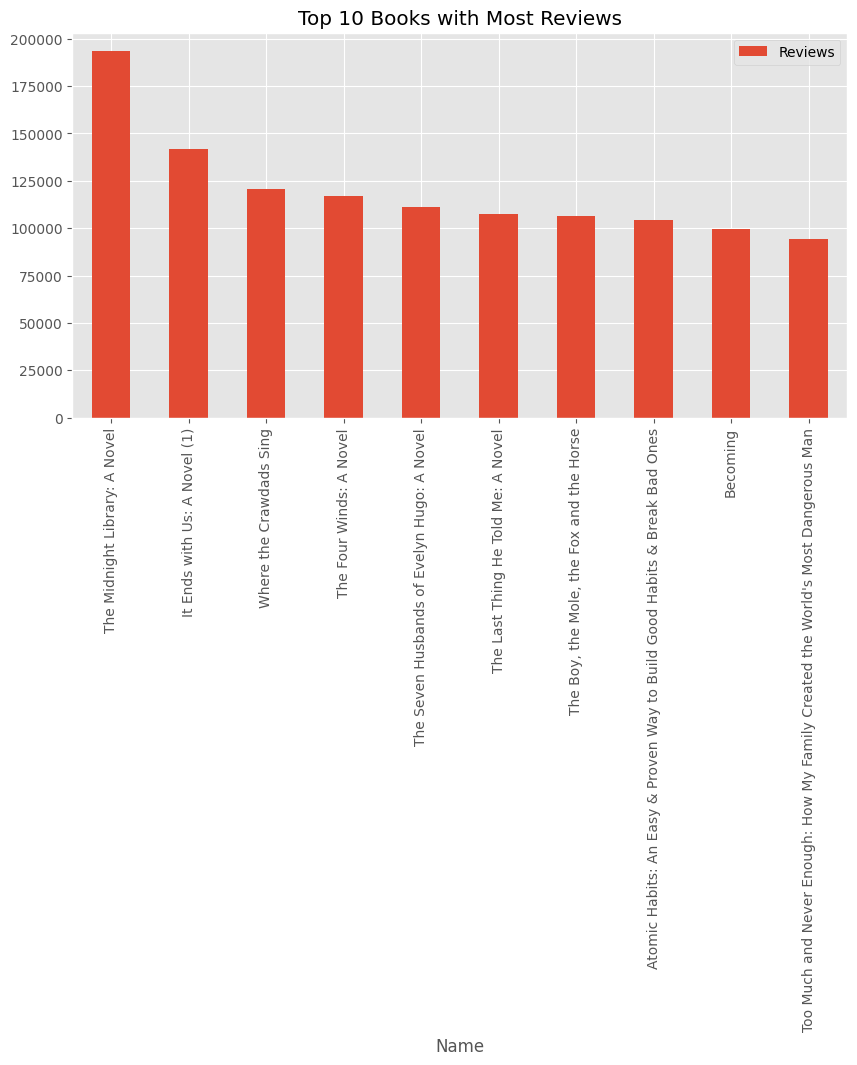

In [32]:
df.sort_values("Reviews", ascending=False).head(10).plot(kind="bar", figsize=(10, 5), x="Name", y="Reviews", title="Top 10 Books with Most Reviews")

In [33]:
df.groupby("Author")["Name"].sum().sort_values(ascending=False).head(10)

Author
Jen Sincero                             You Are a Badass: How to Stop Doubting Your Gr...
R. J. Palacio                                              WonderWonderWonderWonderWonder
Geneen Roth                             Women Food and God: An Unexpected Path to Almo...
Ken Follett                             Winter of the World: Book Two of the Century T...
Cheryl Strayed                          Wild: From Lost to Found on the Pacific Crest ...
The Staff of The Late Show with???€?    Whose Boat Is This Boat?: Comments That Don't ...
Robin DiAngelo                          White Fragility: Why It's So Hard for White Pe...
Maurice Sendak                                                  Where the Wild Things Are
Delia Owens                                Where the Crawdads SingWhere the Crawdads Sing
Paul Kalanithi                                                    When Breath Becomes Air
Name: Name, dtype: object

In [34]:
df.groupby("Author")["Name"].sum().sort_values(ascending=False).head(4)

Author
Jen Sincero      You Are a Badass: How to Stop Doubting Your Gr...
R. J. Palacio                       WonderWonderWonderWonderWonder
Geneen Roth      Women Food and God: An Unexpected Path to Almo...
Ken Follett      Winter of the World: Book Two of the Century T...
Name: Name, dtype: object

In [35]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Price_r,Genre
640,Wonder,R. J. Palacio,4.8,21625,9.0,9,Fiction
344,Ready Player One: A Novel,Ernest Cline,4.6,22536,12.0,12,Fiction


In [36]:
# groupby name of the book by Author
df.groupby("Author")["Name"].unique()

Author
Abraham Verghese                                    [Cutting for Stone]
Adam Gasiewski        [Milk and Vine: Inspirational Quotes From Clas...
Adam Mansbach                                    [Go the F**k to Sleep]
Adam Silvera                                 [They Both Die at the End]
Adam Wallace           [How to Catch a Mermaid, How to Catch a Unicorn]
                                            ...                        
William P. Young          [The Shack: Where Tragedy Confronts Eternity]
Wizards RPG Team               [Player's Handbook (Dungeons & Dragons)]
Wonder House Books    [My First LIbrary: Boxset of 10 Board Books fo...
Workman Publishing    [Paint by Sticker Kids: Unicorns & Magic: Crea...
Zhi Gang Sha          [Divine Soul Mind Body Healing and Transmissio...
Name: Name, Length: 292, dtype: object

In [37]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Price_r,Genre
286,My First Learn to Write Workbook,Crystal Radke,4.8,75486,4.07,5,Non Fiction
396,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24.00,24,Non Fiction


In [38]:
df.drop(columns="Price_r", inplace=True)

<Axes: title={'center': 'User Rating Distribution'}, ylabel='Frequency'>

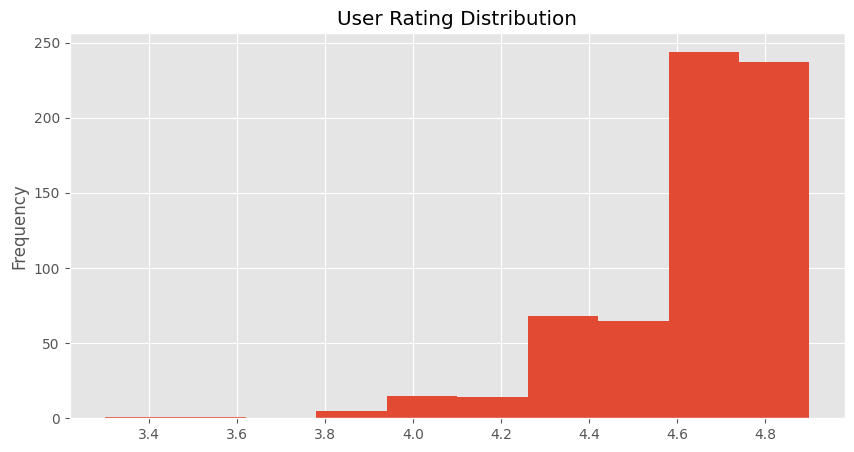

In [39]:
df['User Rating'].plot(kind="hist", figsize=(10, 5), title="User Rating Distribution")

<Axes: title={'center': 'User Rating Distribution'}, ylabel='Density'>

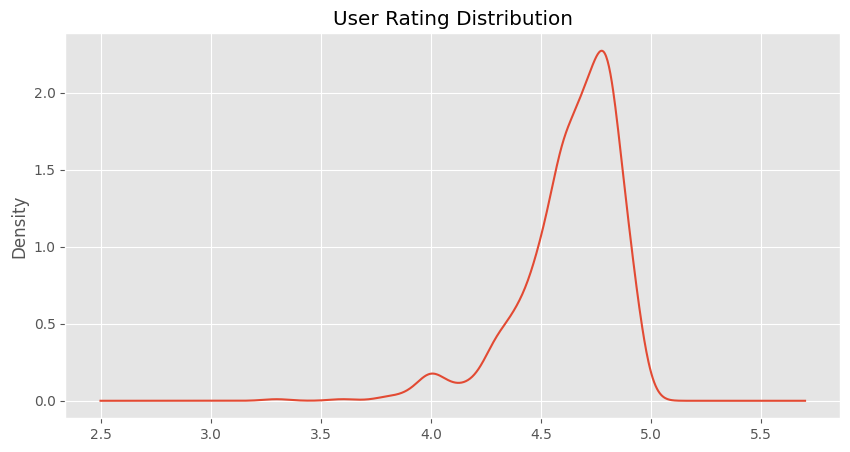

In [40]:
df['User Rating'].plot(kind="kde", figsize=(10, 5), title="User Rating Distribution")

<Axes: title={'center': 'Reviews Distribution'}>

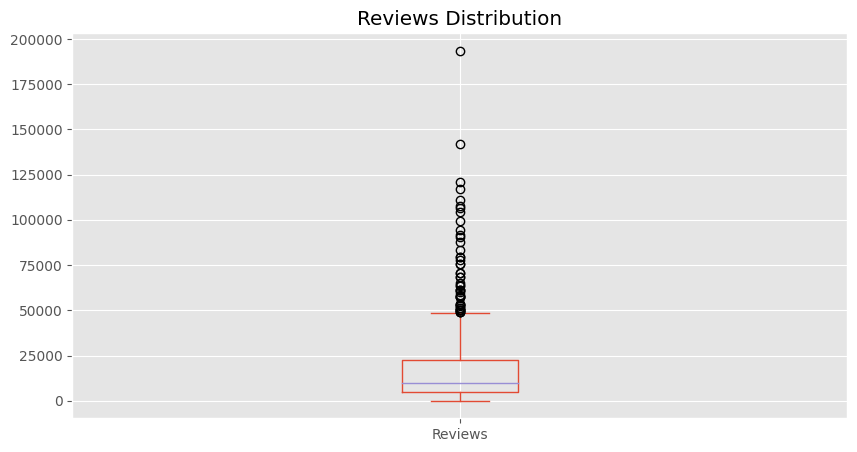

In [41]:
df["Reviews"].plot(kind="box", figsize=(10, 5), title="Reviews Distribution")

<Axes: title={'center': 'Reviews vs Rating'}, xlabel='Reviews Count', ylabel='User Rating'>

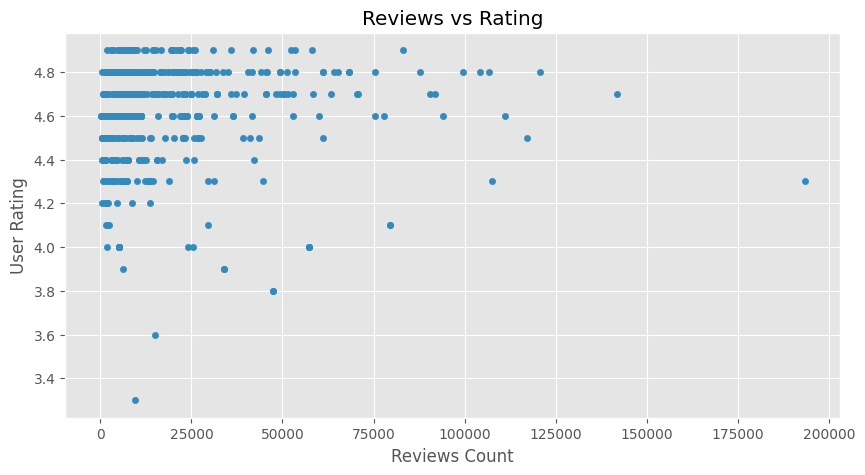

In [42]:
# scatter plot
df.plot(kind="scatter", x="Reviews",xlabel="Reviews Count", y="User Rating", figsize=(10, 5), title="Reviews vs Rating")

<Axes: title={'center': 'Reviews vs Rating'}, xlabel='Reviews Count', ylabel='User Rating'>

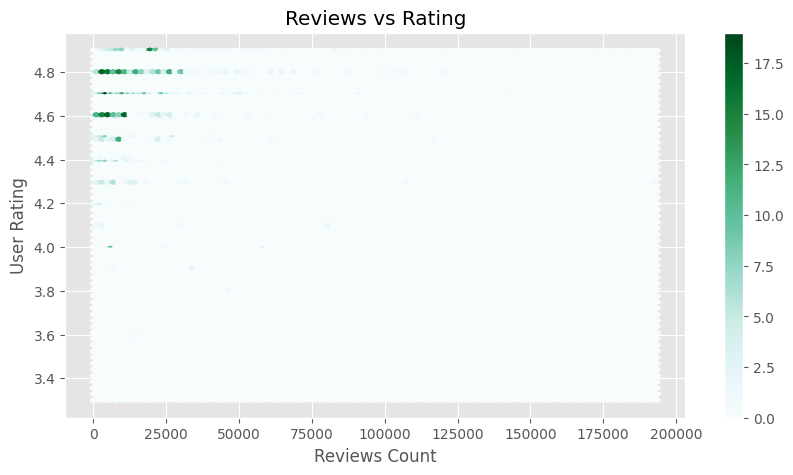

In [43]:
df.plot(kind="hexbin", x="Reviews",xlabel="Reviews Count", y="User Rating", figsize=(10, 5), title="Reviews vs Rating")

<Axes: >

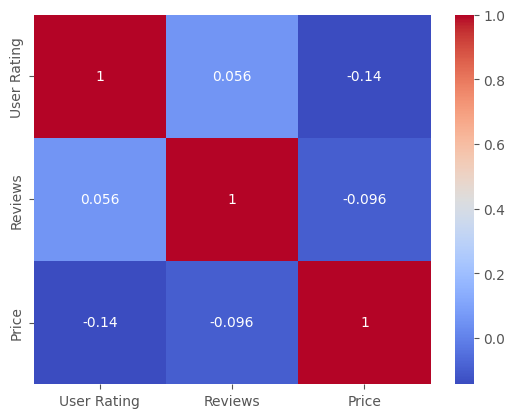

In [44]:
# heatmap for correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

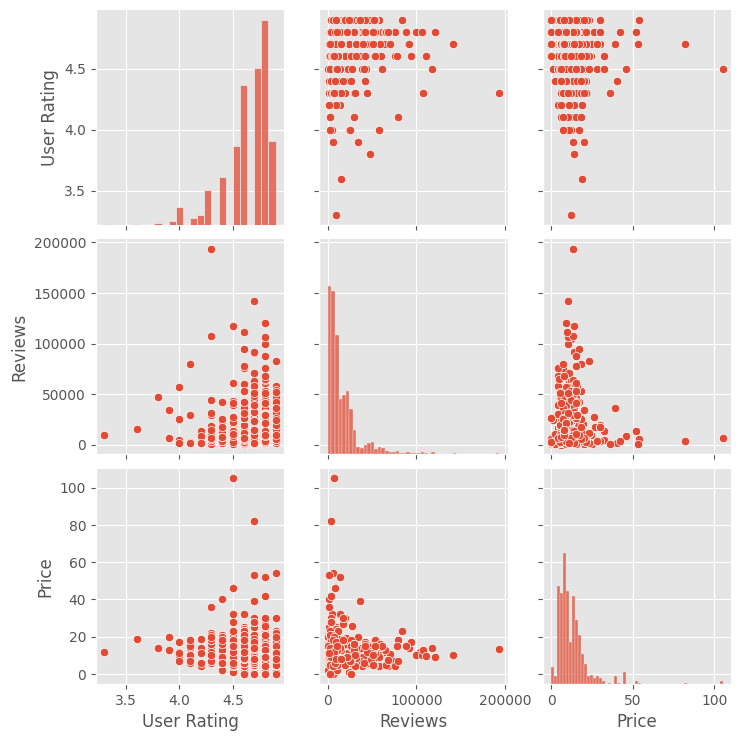

In [45]:
# pairplot
sns.pairplot(df)
plt.show()